# S&P 500 Project

In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import alpaca_trade_api as tradeapi
from config import api_key, secret_key
from sqlalchemy import create_engine
import plotly.express as px

In [2]:
# Get URL of S&P 500 Wikipedia Table
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)
tables

[    Symbol                Security SEC filings             GICS Sector  \
 0      MMM              3M Company     reports             Industrials   
 1      ABT     Abbott Laboratories     reports             Health Care   
 2     ABBV             AbbVie Inc.     reports             Health Care   
 3     ABMD             ABIOMED Inc     reports             Health Care   
 4      ACN           Accenture plc     reports  Information Technology   
 ..     ...                     ...         ...                     ...   
 500    YUM         Yum! Brands Inc     reports  Consumer Discretionary   
 501   ZBRA      Zebra Technologies     reports  Information Technology   
 502    ZBH  Zimmer Biomet Holdings     reports             Health Care   
 503   ZION           Zions Bancorp     reports              Financials   
 504    ZTS                  Zoetis     reports             Health Care   
 
                       GICS Sub Industry     Headquarters Location  \
 0              Industrial C

In [3]:
# Extract Table and only fetch the Symbol and Sector
sp500 = tables[0]
sp500 = sp500.sort_values(by = ['Symbol'])
sp500 = sp500.rename(columns = {'GICS Sector' : 'Sector'})
sp500 = sp500[['Symbol', 'Sector']]
sp500.head(3)

,Symbol,Sector
11,A,Health Care
28,AAL,Industrials
8,AAP,Consumer Discretionary


### Store Main CSV into DataFrame

In [4]:
# Create path to csv file 
main_csv = "../Resources/sp-500-index-08-30-2020.csv"
# Store into DataFrame
main_data_df = pd.read_csv(main_csv)
main_data_df = main_data_df[:-1]
main_data_df.head(3)

,Symbol,Name,Last,Change,%Chg,High,Low,Volume,Time
0,A,Agilent Technologies,99.90,0.88,+0.89%,99.93,98.54,866211.0,08/28/20
1,AAL,American Airlines Gp,13.59,0.31,+2.33%,13.63,13.23,54516301.0,08/28/20
2,AAP,Advance Auto Parts Inc,154.77,0.05,+0.03%,155.59,153.13,611633.0,08/28/20


### Create new dataframe with select columns

In [5]:
# Clean the DataFrame 
new_main_data_df = main_data_df[["Symbol", "Name", "Last"]].copy()
new_main_data_df.head(3)

,Symbol,Name,Last
0,A,Agilent Technologies,99.90
1,AAL,American Airlines Gp,13.59
2,AAP,Advance Auto Parts Inc,154.77


### Store Technical CSV into DataFrame

In [6]:
# Create path to csv file 
technical_csv = "../Resources/technical.csv"
# Store into DataFrame
technical_data_df = pd.read_csv(technical_csv)
technical_data_df = technical_data_df[:-1]
new_technical_data_df = technical_data_df.copy()
new_technical_data_df.head(3)

,Symbol,Name,Last,Opinion,20D Rel Str,20D His Vol,20D Avg Vol,52W Low,52W High
0,A,Agilent Technologies,99.90,100% Buy,63.15%,15.92%,1306305.0,61.13,99.93
1,AAL,American Airlines Gp,13.59,8% Buy,54.93%,63.44%,72526547.0,8.25,31.67
2,AAP,Advance Auto Parts Inc,154.77,88% Buy,55.70%,17.06%,896500.0,71.33,171.43


### Clean DataFrame

In [7]:
# Clean the DataFrame
new_technical_data_df = technical_data_df[["Symbol","52W Low","52W High"]].copy()
new_technical_data_df = new_technical_data_df.rename(columns = {'52W Low': '_52W_Low', 
                                                                '52W High': '_52W_High'})
new_technical_data_df.head(3)

,Symbol,_52W_Low,_52W_High
0,A,61.13,99.93
1,AAL,8.25,31.67
2,AAP,71.33,171.43


### Store Fundamental CSV into DataFrame

In [8]:
# Create path to csv file
fundamental_csv = "../Resources/fundamental.csv"
# Store into DataFrame
fundamental_data_df = pd.read_csv(fundamental_csv)
fundamental_data_df = fundamental_data_df[:-1]
new_fundamental_data_df = fundamental_data_df.copy()
new_fundamental_data_df.head(3)

,Symbol,Name,Market Cap,P/E ttm,EPS ttm,Net Income(a),Beta,Dividend(a),Div Yield
0,A,Agilent Technologies,3.084682e+10,31.04,3.19,1.071000e+09,1.12,0.72,0.72%
1,AAL,American Airlines Gp,6.911345e+09,0.00,-7.90,1.686000e+09,1.63,0.00,0.00%
2,AAP,Advance Auto Parts Inc,1.070064e+10,20.44,7.57,4.869000e+08,1.31,1.00,0.65%


### Clean DataFrame

In [9]:
# Clean the DataFrame
new_fundamental_data_df = fundamental_data_df[["Symbol","Market Cap","P/E ttm","Div Yield"]].copy()
new_fundamental_data_df = new_fundamental_data_df.rename(columns = {'Market Cap': 'Market_Cap', 
                                                                    'P/E ttm': 'PriceEarnings_ttm', 
                                                                    'Div Yield': 'Div_Yield'})
new_fundamental_data_df.sort_values(by = "Div_Yield", ascending = False).head(3)

,Symbol,Market_Cap,PriceEarnings_ttm,Div_Yield
118,CTL,1.206194e+10,7.93,9.10%
497,XOM,1.720468e+11,43.20,8.55%
249,IRM,8.742411e+09,12.74,8.15%


### Store Performance CSV into DataFrame

In [10]:
# Create path to csv file
performance_csv = "../Resources/performance.csv"
# Store into DataFrame
performance_data_df = pd.read_csv(performance_csv)
performance_data_df = performance_data_df[:-1]
new_performance_data_df = performance_data_df.copy()
new_performance_data_df.head(3)

,Symbol,Name,Last,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg
0,A,Agilent Technologies,99.90,+43.60,+17.10%,+4.83%,+15.24%,+42.84%
1,AAL,American Airlines Gp,13.59,-57.80,-52.62%,+15.46%,+23.77%,-46.35%
2,AAP,Advance Auto Parts Inc,154.77,+26.20,-3.37%,+5.87%,+11.80%,+13.17%


### Clean DataFrame

In [11]:
# Clean DataFrame
new_performance_data_df = performance_data_df[["Symbol","YTD %Chg", "1M %Chg", "3M %Chg", "52W %Chg"]].copy()
new_performance_data_df = new_performance_data_df.rename(columns = {'YTD %Chg': 'YTD_PerChg',
                                                                    '1M %Chg': '_1M_PerChg',
                                                                    '3M %Chg': '_3M_PerChg', 
                                                                    '52W %Chg': '_52W_PerChg'})
new_performance_data_df = new_performance_data_df.merge(sp500, on = 'Symbol', how = 'left')
new_performance_data_df = new_performance_data_df[['Symbol', 'Sector', 'YTD_PerChg', '_1M_PerChg', '_3M_PerChg', '_52W_PerChg']]
new_performance_data_df

,Symbol,Sector,YTD_PerChg,_1M_PerChg,_3M_PerChg,_52W_PerChg
0,A,Health Care,+17.10%,+4.83%,+15.24%,+42.84%
1,AAL,Industrials,-52.62%,+15.46%,+23.77%,-46.35%
2,AAP,Consumer Discretionary,-3.37%,+5.87%,+11.80%,+13.17%
3,AAPL,Information Technology,+70.01%,+33.84%,+56.87%,+142.90%
4,ABBV,Health Care,+6.36%,-2.63%,+4.60%,+42.53%
...,...,...,...,...,...,...
501,YUM,Consumer Discretionary,-3.26%,+5.07%,+7.26%,-16.68%
502,ZBH,Health Care,-5.35%,+5.60%,+10.69%,+3.30%
503,ZBRA,Information Technology,+9.68%,+3.31%,+8.83%,+38.11%
504,ZION,Financials,-36.40%,+2.36%,-2.94%,-17.49%


In [12]:
# Get rid of the '%' and change type object into float
new_performance_data_df['YTD_PerChg'] = new_performance_data_df['YTD_PerChg'].str.replace("%", "").astype(float)
new_performance_data_df['_1M_PerChg'] = new_performance_data_df['_1M_PerChg'].str.replace("%", "").astype(float)
new_performance_data_df['_3M_PerChg'] = new_performance_data_df['_3M_PerChg'].str.replace("%", "").astype(float)
new_performance_data_df['_52W_PerChg'] = new_performance_data_df['_52W_PerChg'].str.replace("%", "").astype(float)

In [34]:
# Sort Year to Date % change values from highest to lowest
sortedYTD = new_performance_data_df.sort_values(by = ['YTD_PerChg'], ascending = False).head(10)
grouped_new_performance_data_df = sortedYTD.groupby(['Sector'])
topTenYTDBySector = pd.DataFrame(grouped_new_performance_data_df['Symbol'].count())
topTenYTDBySector_reset = topTenYTDBySector.reset_index()

fig = px.pie(topTenYTDBySector_reset, values='Symbol', names='Sector', title='Top 10 Stocks with YTD%Chg by Sector',
              labels=['Sector'], color_discrete_sequence=px.colors.sequential.Teal)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

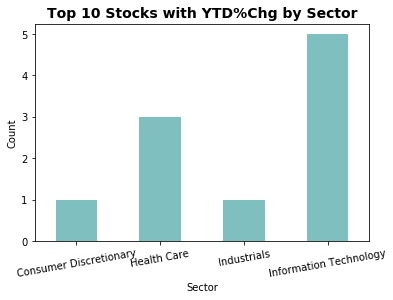

In [22]:
topTenYTDBySector.plot(kind = "bar", alpha=0.5, color='teal', align="center", legend = False, rot =10)
plt.title('Top 10 Stocks with YTD%Chg by Sector', fontsize = 14, fontweight = 'bold')
plt.ylabel('Count')
plt.xlabel('Sector')
plt.savefig('../Resources/assets/images/Bar_Top_5_YTDPerChg')
plt.show()

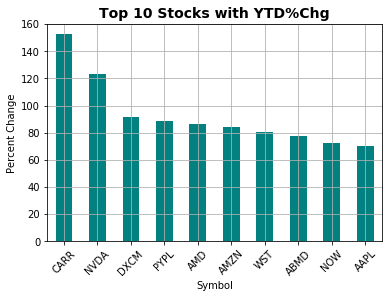

In [27]:
sortedYTD.plot(kind = "bar", x = 'Symbol', y = 'YTD_PerChg', alpha=0.99, color='teal', 
                  align="center", legend = False, rot =45)
plt.title('Top 10 Stocks with YTD%Chg', fontsize = 14, fontweight = 'bold')
plt.ylabel('Percent Change')
plt.xlabel('Symbol')
plt.grid()
plt.savefig('../Resources/assets/images/Bar_Top_10_YTDPerChg')
plt.show()

In [36]:
# Sort 1 month % change values from highest to lowest
sorted1MChg = new_performance_data_df.sort_values(by = ['_1M_PerChg'], ascending = False).head(10)
grouped_new_performance_data_df = sorted1MChg.groupby(['Sector'])
topTen1MBySector = pd.DataFrame(grouped_new_performance_data_df['Symbol'].count())
topTen1MBySector_reset = topTen1MBySector.reset_index()

fig = px.pie(topTen1MBySector_reset, values='Symbol', names='Sector', title='Top 10 Stocks with 1M%Chg by Sector',
              labels=['Sector'], color_discrete_sequence=px.colors.sequential.Purp)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

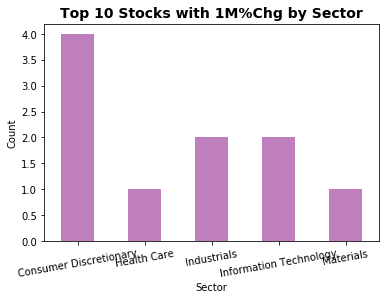

In [37]:
topTen1MBySector.plot(kind = "bar", alpha=0.5, color='purple', align="center", legend = False, rot =10)
plt.title('Top 10 Stocks with 1M%Chg by Sector', fontsize = 14, fontweight = 'bold')
plt.ylabel('Count')
plt.xlabel('Sector')
plt.savefig('../Resources/assets/images/Bar_Top_5_1MPerChg')
plt.show()

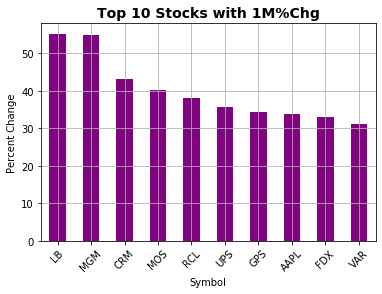

In [38]:
sorted1MChg.plot(kind = "bar", x = 'Symbol', y = '_1M_PerChg', alpha=0.99, color='purple', 
                  align="center", legend = False, rot =45)
plt.title('Top 10 Stocks with 1M%Chg', fontsize = 14, fontweight = 'bold')
plt.ylabel('Percent Change')
plt.xlabel('Symbol')
plt.grid()
plt.savefig('../Resources/assets/images/Bar_Top_10_1MPerChg')
plt.show()

In [39]:
# Sort 3 month % change values from highest to lowest
sorted3MChg = new_performance_data_df.sort_values(by = ['_3M_PerChg'], ascending = False).head(10)
grouped_new_performance_data_df = sorted3MChg.groupby(['Sector'])
topTen3MBySector = pd.DataFrame(grouped_new_performance_data_df['Symbol'].count())
topTen3MBySector_reset = topTen3MBySector.reset_index()

fig = px.pie(topTen3MBySector_reset, values='Symbol', names='Sector', title='Top 10 Stocks with 3M%Chg by Sector',
              labels=['Sector'], color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

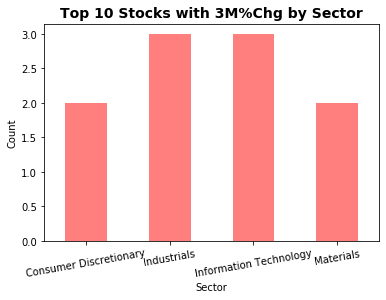

In [40]:
topTen3MBySector.plot(kind = "bar", alpha=0.5, color='r', align="center", legend = False, rot =10)
plt.title('Top 10 Stocks with 3M%Chg by Sector', fontsize = 14, fontweight = 'bold')
plt.ylabel('Count')
plt.xlabel('Sector')
plt.savefig('../Resources/assets/images/Bar_Top_5_3MPerChg')
plt.show()

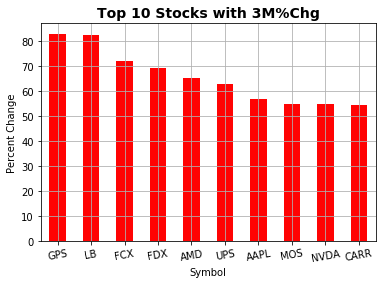

In [41]:
sorted3MChg.plot(kind = "bar", x = 'Symbol', y = '_3M_PerChg', alpha=0.99, color='r', 
                  align="center", legend = False, rot =10)
plt.title('Top 10 Stocks with 3M%Chg', fontsize = 14, fontweight = 'bold')
plt.ylabel('Percent Change')
plt.xlabel('Symbol')
plt.grid()
plt.savefig('../Resources/assets/images/Bar_Top_10_3MPerChg')
plt.show()

In [43]:
 # Sort 52 week % change values from highest to lowest
sorted52WChg = new_performance_data_df.sort_values(by = ['_52W_PerChg'], ascending = False).head(10)
grouped_new_performance_data_df = sorted52WChg.groupby(['Sector'])
topTen52WChgBySector = pd.DataFrame(grouped_new_performance_data_df['Symbol'].count())
topTen52WChgBySector_reset = topTen52WChgBySector.reset_index()



fig = px.pie(topTen52WChgBySector_reset, values='Symbol', names='Sector', title='Top 10 Stocks with 52W%Chg by Sector',
              labels=['Sector'], color_discrete_sequence=px.colors.sequential.algae)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

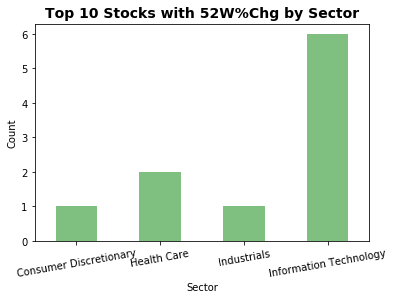

In [44]:
topTen52WChgBySector.plot(kind = "bar", alpha=0.5, color='g', align="center", legend = False, rot =10)
plt.title('Top 10 Stocks with 52W%Chg by Sector', fontsize = 14, fontweight = 'bold')
plt.ylabel('Count')
plt.xlabel('Sector')
plt.savefig('../Resources/assets/images/Bar_Top_5_52WPerChg')
plt.show()

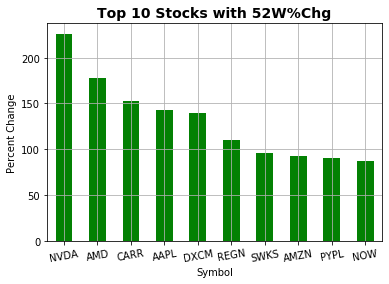

In [45]:
_sorted52WChg = new_performance_data_df.sort_values(by = ['_52W_PerChg'], ascending = False).head(10)
_grouped_new_performance_data_df = _sorted52WChg.groupby(['Sector'])
_topTen52WChgBySector = pd.DataFrame(_grouped_new_performance_data_df['Symbol'].count())
_sorted52WChg.plot(kind = "bar", x = 'Symbol', y = '_52W_PerChg', alpha=0.99, color='g', 
                  align="center", legend = False, rot =10)
plt.title('Top 10 Stocks with 52W%Chg', fontsize = 14, fontweight = 'bold')
plt.ylabel('Percent Change')
plt.xlabel('Symbol')
plt.grid()
# Save Image
plt.savefig('../Resources/assets/images/Bar_Top_10_52WPerChg')
plt.show()

### Make an API calls

In [46]:
# Create api format from base url website 
api = tradeapi.REST(api_key, secret_key, base_url='https://api.alpaca.markets')
# Look up stock ticker CARR info
carr = api.polygon.historic_agg_v2('CARR', 1, 'day', _from='2020-01-01', to='2020-08-31').df
# Create Dataframe
carr = pd.DataFrame(carr)
carr = carr.reset_index()
# Get rid of the timestamp
carr['timestamp'] = pd.to_datetime(carr['timestamp']).dt.date
carr = carr.rename(columns = {'timestamp': 'Date'})
carr.head(3)

,Date,open,high,low,close,volume,vwap
0,2020-04-03,13.75,17.00,13.38,16.92,67008862.0,16.1724
1,2020-04-06,17.06,17.15,14.85,15.44,37293052.0,15.8450
2,2020-04-07,15.20,15.80,14.55,15.25,23832157.0,15.2030


In [47]:
# Look up stock ticker NVDA info
nvda = api.polygon.historic_agg_v2('NVDA', 1, 'day', _from='2020-01-01', to='2020-08-31').df
# Create Dataframe
nvda = pd.DataFrame(nvda)
nvda = nvda.reset_index()
# Get rid of the timestamp
nvda['timestamp'] = pd.to_datetime(nvda['timestamp']).dt.date
nvda = nvda.rename(columns = {'timestamp': 'Date'})
nvda.head(3)

,Date,open,high,low,close,volume,vwap
0,2020-01-02,238.75,239.91,236.72,239.91,5941969.0,238.7233
1,2020-01-03,235.10,237.83,234.10,236.07,5141968.0,236.3844
2,2020-01-06,232.32,237.27,231.31,237.06,6572812.0,235.4688


In [48]:
# Look up stock ticker DXCM info
dxcm = api.polygon.historic_agg_v2('DXCM', 1, 'day', _from='2020-01-01', to='2020-08-31').df
# Create Dataframe
dxcm = pd.DataFrame(dxcm)
dxcm = dxcm.reset_index()
# Get rid of the timestamp
dxcm['timestamp'] = pd.to_datetime(dxcm['timestamp']).dt.date
dxcm = dxcm.rename(columns = {'timestamp': 'Date'})
dxcm.head(3)

,Date,open,high,low,close,volume,vwap
0,2020-01-02,218.56,222.630,213.6874,219.38,852579.0,217.7977
1,2020-01-03,216.79,219.525,215.2100,218.70,542828.0,218.3008
2,2020-01-06,217.92,227.175,216.7500,225.99,674893.0,224.5026


In [49]:
# Look up stock ticker PYPL info
pypl = api.polygon.historic_agg_v2('PYPL', 1, 'day', _from='2020-01-01', to='2020-08-31').df
# Create Dataframe
pypl = pd.DataFrame(pypl)
pypl = pypl.reset_index()
# Get rid of the timestamp
pypl['timestamp'] = pd.to_datetime(pypl['timestamp']).dt.date
pypl = pypl.rename(columns = {'timestamp': 'Date'})
pypl.head(3)

,Date,open,high,low,close,volume,vwap
0,2020-01-02,109.47,111.21,109.275,110.75,7419283.0,110.6741
1,2020-01-03,109.49,110.42,108.760,108.76,7099931.0,109.3224
2,2020-01-06,107.57,110.22,107.440,110.17,6766627.0,109.4693


In [50]:
# Look up stock ticker AMD info
amd = api.polygon.historic_agg_v2('AMD', 1, 'day', _from='2020-01-01', to='2020-08-31').df
# Create Dataframe
amd = pd.DataFrame(amd)
amd = amd.reset_index()
# Get rid of the timestamp
amd['timestamp'] = pd.to_datetime(amd['timestamp']).dt.date
amd = amd.rename(columns = {'timestamp': 'Date'})
amd.head(3)

,Date,open,high,low,close,volume,vwap
0,2020-01-02,46.86,49.25,46.63,49.10,80524599.0,48.1852
1,2020-01-03,48.03,49.39,47.54,48.60,73362157.0,48.5379
2,2020-01-06,48.02,48.86,47.86,48.39,48176286.0,48.4085


In [51]:
# Look up stock ticker SPY info for referring to S&P 500
spy = api.polygon.historic_agg_v2('SPY', 1, 'day', _from='2020-01-01', to='2020-08-31').df
# Create Dataframe
spy = pd.DataFrame(spy)
spy = spy.reset_index()
# Get rid of the timestamp
spy['timestamp'] = pd.to_datetime(spy['timestamp']).dt.date
spy= spy.rename(columns = {'timestamp': 'Date'})
spy.head(3)

,Date,open,high,low,close,volume,vwap
0,2020-01-02,323.54,324.89,322.53,324.87,59498997.0,323.7095
1,2020-01-03,321.16,323.64,321.10,322.41,78022635.0,322.7868
2,2020-01-06,320.49,323.73,320.36,323.64,56028843.0,322.7126


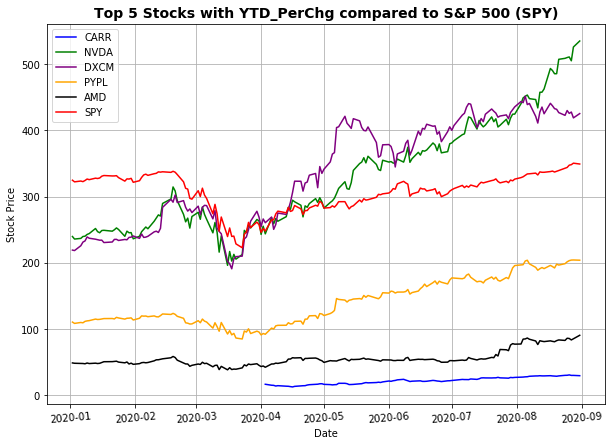

In [52]:
# Make sure ax = ax so every plot is on same Y-axis
# gca stands for 'get current axis'
ax = plt.gca()
# Plot the Top 5 stocks in S&P 500 with highest Year to Date % Change 
carr.plot(kind = 'line', x = 'Date', y = 'close', color ='blue', ax=ax, rot =25, figsize = (10,7))
nvda.plot(kind = 'line', x = 'Date', y = 'close', color ='green', ax=ax, rot =25, figsize = (10,7))
dxcm.plot(kind = 'line', x = 'Date', y = 'close', color ='purple', ax=ax, rot =25, figsize = (10,7))
pypl.plot(kind = 'line', x = 'Date', y = 'close', color ='orange', ax=ax, rot =25, figsize = (10,7))
amd.plot(kind = 'line', x = 'Date', y = 'close', color ='black', ax=ax, rot =5, figsize = (10,7))
spy.plot(kind = 'line', x = 'Date', y = 'close', color ='red', ax=ax, rot=5, figsize = (10,7))
ax.legend(["CARR", "NVDA", "DXCM", "PYPL", "AMD", "SPY"])
plt.grid()
plt.title('Top 5 Stocks with YTD_PerChg compared to S&P 500 (SPY)', fontsize = 14, fontweight = 'bold')
plt.ylabel('Stock Price')
# Save image
plt.savefig('../Resources/assets/images/Line_Top_5_YTD_PerChg')
plt.show()

### API Call for Top Stocks with best 1M%Chg as of 8/31/2020

In [53]:
# Look up stock ticker LB info
lb = api.polygon.historic_agg_v2('LB', 1, 'day', _from='2020-01-01', to='2020-08-31').df
# Store into DataFrame
lb = pd.DataFrame(lb)
lb = lb.reset_index()
# Get rid of timestamp
lb['timestamp'] = pd.to_datetime(lb['timestamp']).dt.date
lb = lb.rename(columns = {'timestamp': 'Date'})
lb.head(3)

,Date,open,high,low,close,volume,vwap
0,2020-01-02,18.25,18.26,17.275,17.49,7442130.0,17.5096
1,2020-01-03,18.02,19.09,17.890,18.86,16374035.0,18.6672
2,2020-01-06,18.70,18.72,18.020,18.16,9048422.0,18.2288


In [54]:
# Look up stock ticker MGM info
mgm = api.polygon.historic_agg_v2('MGM', 1, 'day', _from='2020-01-01', to='2020-08-31').df
# Store into DataFrame
mgm = pd.DataFrame(mgm)
mgm = mgm.reset_index()
# Get rid of timestamp
mgm['timestamp'] = pd.to_datetime(mgm['timestamp']).dt.date
mgm = mgm.rename(columns = {'timestamp': 'Date'})
mgm.head(3)

,Date,open,high,low,close,volume,vwap
0,2020-01-02,33.52,33.70,33.29,33.66,3490241.0,33.5028
1,2020-01-03,33.21,33.43,33.11,33.29,3330556.0,33.2659
2,2020-01-06,32.98,33.05,32.85,32.89,4091538.0,32.9177


In [55]:
# Look up stock ticker CRM info
crm = api.polygon.historic_agg_v2('CRM', 1, 'day', _from='2020-01-01', to='2020-08-31').df
# Store into DataFrame
crm = pd.DataFrame(crm)
crm = crm.reset_index()
# Get rid of timestamp
crm['timestamp'] = pd.to_datetime(crm['timestamp']).dt.date
crm = crm.rename(columns = {'timestamp': 'Date'})
crm.head(3)

,Date,open,high,low,close,volume,vwap
0,2020-01-02,163.92,167.07,163.58,166.99,5163088.0,165.6700
1,2020-01-03,165.06,166.77,165.00,166.17,3284201.0,166.1507
2,2020-01-06,165.00,173.67,164.45,173.45,8952359.0,171.2013


In [56]:
# Look up stock ticker MOS info
mos = api.polygon.historic_agg_v2('MOS', 1, 'day', _from='2020-01-01', to='2020-08-31').df
# Store into DataFrame
mos = pd.DataFrame(mos)
mos = mos.reset_index()
# Get rid of timestamp
mos['timestamp'] = pd.to_datetime(mos['timestamp']).dt.date
mos = mos.rename(columns = {'timestamp': 'Date'})
mos.head(3)

,Date,open,high,low,close,volume,vwap
0,2020-01-02,21.92,22.15,21.26,21.43,4226531.0,21.4965
1,2020-01-03,21.24,21.49,20.74,20.76,4159989.0,20.9967
2,2020-01-06,20.62,20.96,20.36,20.76,4160102.0,20.7295


In [57]:
# Look up stock ticker RCL info
rcl = api.polygon.historic_agg_v2('RCL', 1, 'day', _from='2020-01-01', to='2020-08-31').df
# Store into DataFrame
rcl = pd.DataFrame(rcl)
rcl = rcl.reset_index()
# Get rid of timestamp
rcl['timestamp'] = pd.to_datetime(rcl['timestamp']).dt.date
rcl = rcl.rename(columns = {'timestamp': 'Date'})
rcl.head(3)

,Date,open,high,low,close,volume,vwap
0,2020-01-02,134.55,134.800,133.47,134.65,1024921.0,134.1215
1,2020-01-03,132.79,133.620,131.81,133.49,1236464.0,133.1050
2,2020-01-06,131.59,131.869,130.39,131.63,1547637.0,131.4203


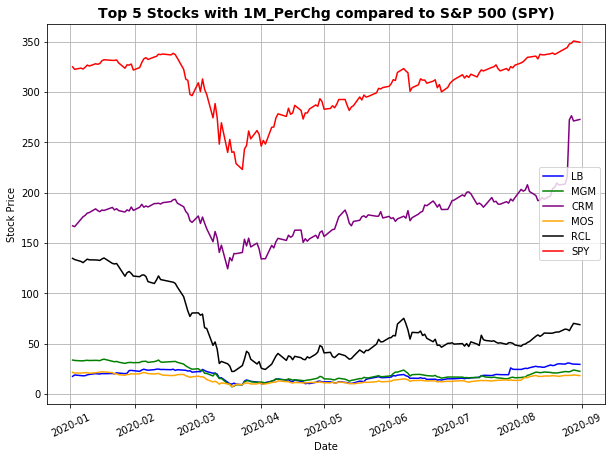

In [58]:
# Make sure ax = ax so every plot is on same Y-axis
ax = plt.gca()
# Plot the Top 5 stocks in S&P 500 with highest 1 Month % Change 
lb.plot(kind = 'line', x = 'Date', y = 'close', color ='blue', ax=ax, rot =25, figsize = (10,7))
mgm.plot(kind = 'line', x = 'Date', y = 'close', color ='green', ax=ax, rot =25, figsize = (10,7))
crm.plot(kind = 'line', x = 'Date', y = 'close', color ='purple', ax=ax, rot =25, figsize = (10,7))
mos.plot(kind = 'line', x = 'Date', y = 'close', color ='orange', ax=ax, rot =25, figsize = (10,7))
rcl.plot(kind = 'line', x = 'Date', y = 'close', color ='black', ax=ax, rot =25, figsize = (10,7))
spy.plot(kind = 'line', x = 'Date', y = 'close', color ='red', ax=ax, rot=25, figsize = (10,7))
ax.legend(["LB", "MGM", "CRM", "MOS", "RCL", "SPY"])
plt.grid()
plt.title('Top 5 Stocks with 1M_PerChg compared to S&P 500 (SPY)', fontsize = 14, fontweight = 'bold')
plt.ylabel('Stock Price')
# Save Image
plt.savefig('../Resources/assets/images/Line_Top_5_1M_PerChg')
plt.show()

### API Call for Top Stocks with best 3M%Chg as of 8/31/2020

In [59]:
# Look up stock ticker RCL info
gbs = api.polygon.historic_agg_v2('GBS', 1, 'day', _from='2020-01-01', to='2020-08-31').df
# Store into DataFrame
gbs = pd.DataFrame(gbs)
gbs = gbs.reset_index()
# Get rid of timestamp
gbs['timestamp'] = pd.to_datetime(gbs['timestamp']).dt.date
gbs = gbs.rename(columns = {'timestamp': 'Date'})
gbs
# For some reason ticker GBS information could not be called.

,Date,open,high,low,close,volume,vwap


In [60]:
# Look up stock ticker RCL info
fcx = api.polygon.historic_agg_v2('FCX', 1, 'day', _from='2020-01-01', to='2020-08-31').df
# Store into DataFrame
fcx = pd.DataFrame(fcx)
fcx = fcx.reset_index()
# Get rid of timestamp
fcx['timestamp'] = pd.to_datetime(fcx['timestamp']).dt.date
fcx = fcx.rename(columns = {'timestamp': 'Date'})
fcx.head(3)

,Date,open,high,low,close,volume,vwap
0,2020-01-02,13.35,13.45,13.13,13.20,22977628.0,13.2826
1,2020-01-03,13.00,13.09,12.79,12.80,20625894.0,12.8722
2,2020-01-06,12.63,12.93,12.53,12.85,19345322.0,12.8014


In [61]:
# Look up stock ticker RCL info
fdx = api.polygon.historic_agg_v2('FDX', 1, 'day', _from='2020-01-01', to='2020-08-31').df
# Store into DataFrame
fdx = pd.DataFrame(fdx)
fdx = fdx.reset_index()
# Get rid of timestamp
fdx['timestamp'] = pd.to_datetime(fdx['timestamp']).dt.date
fdx = fdx.rename(columns = {'timestamp': 'Date'})
fdx.head(3)

,Date,open,high,low,close,volume,vwap
0,2020-01-02,152.42,155.10,151.6001,155.10,2975366.0,153.6750
1,2020-01-03,152.50,153.34,151.8400,153.18,2251162.0,152.7930
2,2020-01-06,151.25,153.55,150.1700,153.30,2430690.0,152.1929


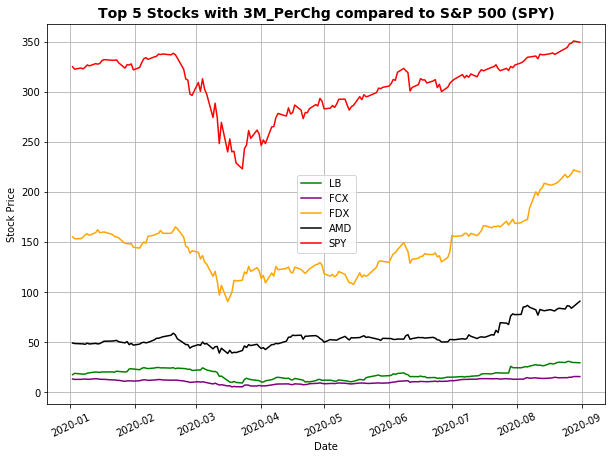

In [62]:
# Make sure ax = ax so every plot is on same Y-axis
ax = plt.gca()
# Plot the Top 5 stocks in S&P 500 with highest 3 Month % Change 
# For some reason ticker GBS information could not be called.
#gbs.plot(kind = 'line', x = 'Date', y = 'close', color ='blue', ax=ax, rot =45, figsize = (10,7))
lb.plot(kind = 'line', x = 'Date', y = 'close', color ='green', ax=ax, rot =25, figsize = (10,7))
fcx.plot(kind = 'line', x = 'Date', y = 'close', color ='purple', ax=ax, rot =25, figsize = (10,7))
fdx.plot(kind = 'line', x = 'Date', y = 'close', color ='orange', ax=ax, rot =25, figsize = (10,7))
amd.plot(kind = 'line', x = 'Date', y = 'close', color ='black', ax=ax, rot =25, figsize = (10,7))
spy.plot(kind = 'line', x = 'Date', y = 'close', color ='red', ax=ax, rot=25, figsize = (10,7))
ax.legend(["LB", "FCX", "FDX", "AMD", "SPY"])
plt.grid()
plt.title('Top 5 Stocks with 3M_PerChg compared to S&P 500 (SPY)', fontsize = 14, fontweight = 'bold')
plt.ylabel('Stock Price')
# Save Image
plt.savefig('../Resources/assets/images/Line_Top_5_3M_PerChg')
plt.show()

### API Call for Top Stocks with best 52W%Chg as of 8/31/2020

In [64]:
# Look up stock ticker AAPL info
# AAPL's stock split on 8/31/20 so most of their numbers have recently changed
aapl = api.polygon.historic_agg_v2('AAPL', 1, 'day', _from='2020-01-01', to='2020-08-31').df
# Store in DataFrame
aapl = pd.DataFrame(aapl)
aapl = aapl.reset_index()
# Get rid of timestamp
aapl['timestamp'] = pd.to_datetime(aapl['timestamp']).dt.date
aapl = aapl.rename(columns = {'timestamp': 'Date'})
aapl.head(3)

,Date,open,high,low,close,volume,vwap
0,2020-01-02,74.0600,75.150,73.7975,75.0875,135647456.0,298.4396
1,2020-01-03,74.2875,75.145,74.1250,74.3575,146535512.0,298.8104
2,2020-01-06,73.4475,74.990,73.1875,74.9500,118518576.0,297.7997


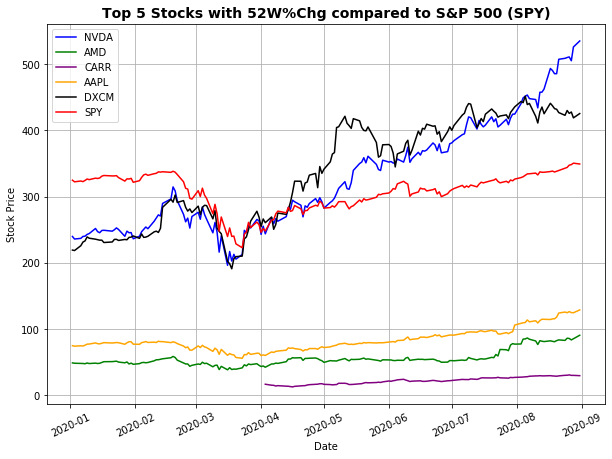

In [65]:
# Make sure ax = ax so every plot is on same Y-axis
ax = plt.gca()
# Plot the Top 5 stocks in S&P 500 with highest 52 week % Change
nvda.plot(kind = 'line', x = 'Date', y = 'close', color ='blue', ax=ax, rot =25, figsize = (10,7))
amd.plot(kind = 'line', x = 'Date', y = 'close', color ='green', ax=ax, rot =25, figsize = (10,7))
carr.plot(kind = 'line', x = 'Date', y = 'close', color ='purple', ax=ax, rot =25, figsize = (10,7))
aapl.plot(kind = 'line', x = 'Date', y = 'close', color ='orange', ax=ax, rot =25, figsize = (10,7))
dxcm.plot(kind = 'line', x = 'Date', y = 'close', color ='black', ax=ax, rot =25, figsize = (10,7))
spy.plot(kind = 'line', x = 'Date', y = 'close', color ='red', ax=ax, rot=25, figsize = (10,7))
ax.legend(["NVDA", "AMD", "CARR", "AAPL", "DXCM", "SPY"])
plt.grid()
plt.title('Top 5 Stocks with 52W%Chg compared to S&P 500 (SPY)', fontsize = 14, fontweight = 'bold')
plt.ylabel('Stock Price')
# Save Image
plt.savefig('../Resources/assets/images/Line_Top_5_52WPerChg')
plt.show()

### Create Connection

In [66]:
rds_connection_string = "postgres:postgres@localhost:5432/sp500_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

### Check for tables

In [67]:
engine.table_names()

['main_data', 'technical_data', 'fundamental_data', 'performance_data']

### Use pandas to load csv converted DataFrame into database

In [68]:
new_main_data_df.to_sql(name='main_data', con=engine, if_exists='replace', index=False)
new_technical_data_df.to_sql(name='technical_data', con=engine, if_exists='replace', index=False)
new_fundamental_data_df.to_sql(name='fundamental_data', con=engine, if_exists='replace', index=False)
new_performance_data_df.to_sql(name='performance_data', con=engine, if_exists='replace', index=False)

### Confirm data has been added by querying the main_data table
* NOTE: can also check using pgAdmin

In [69]:
pd.read_sql_query('select * from main_data', con=engine).head()

,Symbol,Name,Last
0,A,Agilent Technologies,99.90
1,AAL,American Airlines Gp,13.59
2,AAP,Advance Auto Parts Inc,154.77
3,AAPL,Apple Inc,499.23
4,ABBV,Abbvie Inc,94.17


### Confirm data has been added by querying the technical_data table

In [70]:
pd.read_sql_query('select * from technical_data', con=engine).head()

,Symbol,_52W_Low,_52W_High
0,A,61.13,99.93
1,AAL,8.25,31.67
2,AAP,71.33,171.43
3,AAPL,204.22,515.14
4,ABBV,62.55,101.28


### Confirm data has been added by querying the fundamental_data table

In [71]:
pd.read_sql_query('select * from fundamental_data', con=engine).head()

,Symbol,Market_Cap,PriceEarnings_ttm,Div_Yield
0,A,3.084682e+10,31.04,0.72%
1,AAL,6.911345e+09,0.00,0.00%
2,AAP,1.070064e+10,20.44,0.65%
3,AAPL,2.134525e+12,38.03,0.66%
4,ABBV,1.661943e+11,10.14,5.01%


### Confirm data has been added by querying the performance_data table

In [72]:
pd.read_sql_query('select * from performance_data', con=engine).head()

,Symbol,Sector,YTD_PerChg,_1M_PerChg,_3M_PerChg,_52W_PerChg
0,A,Health Care,17.10,4.83,15.24,42.84
1,AAL,Industrials,-52.62,15.46,23.77,-46.35
2,AAP,Consumer Discretionary,-3.37,5.87,11.80,13.17
3,AAPL,Information Technology,70.01,33.84,56.87,142.90
4,ABBV,Health Care,6.36,-2.63,4.60,42.53
